# What collage Majors you should choose for guaranteeing your success
**-for knowing the answer have a look below**

**30th Aug 2020**

Form last one month my cusion is searching for what Graduation she should do, for earning more money.
But the problem is that she is also forcing me to search for her, So now i have decided  rather then readings blogs online, i will use my data analysis skills for giving her answer as well as resion why?
So i searched for the data.....

**I got  `recent-grads.csv` on the job outcomes of students who graduated from college between 2010 and 2012**. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity,

Headers for recent-grads.csv are shown below:

|**Header**|**Description**|
|-|-|
|Rank| Rank by median earnings **(the dataset is ordered by this column)**|
|Major_code| Major code, FO1DP in ACS PUMS|
|Major|	Major description|
|Major_category|Category of major from Carnevale et al|
|Total|	Total number of people with major|
|Sample_size|	Sample size (unweighted) of full-time, year-round ONLY (used for earnings)|
|Men|	Male graduates|
|Women|	Female graduates|
|ShareWomen|	Women as share of total|
|Employed|	Number employed (ESR == 1 or 2)|
|Full_time|	Employed 35 hours or more|
|Part_time|	Employed less than 35 hours|
|Full_time_year_round|	Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)|
|Unemployed|	Number unemployed (ESR == 3)|
|Unemployment_rate|	Unemployed / (Unemployed + Employed)|
|Median|	Median earnings of full-time, year-round workers|
|P25th|	25th percentile of earnings|
|P75th|	75th percentile of earnings|
|College_jobs|	Number with job requiring a college degree|
|Non_college_jobs|	Number with job not requiring a college degree|
|Low_wage_jobs|	Number in low-wage service jobs|


Using visualizations, we can start to explore interesting questions, such as:

- Do students in more popular majors make more money?Using scatter plots

- How many majors are predominantly male? Predominantly female? Using histograms

- Which category of majors have the most students? Using bar plots

AND MANY MORE!

Before we start creating data visualizations, let's import the libraries we need, explore the dataset, and remove rows containing null values.




#  Setting Up The  Environment

### Importing libraries, controlling figure aesthetics & run the Jupyter magic: `%matplotlib inline`

In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#running some magic ;D
%matplotlib inline
#supernecessary --> so that Jupyter display all the plots inline.

## Reading & Exploring

**Read the dataset into a DataFrame and start exploring the data.**

In [3]:
# So this is the link of Git-Hub repository from where the data is Fetched 

recent_grads='https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv'
# recent_grads= pd.read_csv(recent_grads, error_bad_lines=False)
recent_grads= pd.read_csv(recent_grads)

raw_data_count=recent_grads.shape
print('\n','No of rows and Columns: ',raw_data_count,'\n')



 No of rows and Columns:  (173, 21) 



In [4]:
recent_grads.info()# Lets check the data-type of our columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [5]:
recent_grads.head(5)# familiarize ourself how data is structured.

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [6]:
recent_grads.tail() # familiarize ourself how data is structured

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


A small conclusion : Thhe data is ordered by Rank(rank by median earnings)
- Majors in top 5 median earnings are in engineering category.
- Majors in the bottom 5 lowest median earnings are in the biology & life science, psychology & social work, and education categories

Well...I'm not surprised...lets proceed with our project 


In [7]:
recent_grads.describe()# Summary statistics for all the numeric columns

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


## Cleaning Data : Checking for Missing values

**We will check for the missing value,and will drop rows with missing values, because Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.**

In [8]:
#checking for missing values 
recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

So there are one-one  missing values in columns `Total`, `Men`, `Women`, `ShareWomen`

In [9]:
#drop rows containing missing values
recent_grads = recent_grads.dropna()

In [10]:
#check the number of rows of the cleaned DataFrame
cleaned_data_count = len(recent_grads.index)
cleaned_data_count

172

In [11]:
#comparing
print('raw data count: ',raw_data_count[0], '|','cleaned_data_count: ',cleaned_data_count)

raw data count:  173 | cleaned_data_count:  172


**Let us check for how many mens and womens we are analysing the data :**

In [12]:
# Calculating the ratio of womens and mens data analysed

# mens number
mens=recent_grads['Men']
total_mens_data_analysed=0
for i in mens:
    total_mens_data_analysed=total_mens_data_analysed+i
print('Total mens data analysed :', round(total_mens_data_analysed))

# womens number
womens=recent_grads['Women']
total_womens_data_analysed=0
for i in womens:
    total_womens_data_analysed=total_womens_data_analysed+i
print('Total womens data analysed :',round(total_womens_data_analysed))

#total peoples data analysed
total_peoples_data_analyed=total_mens_data_analysed+total_womens_data_analysed
print('Total peoples data analysed: ',round(total_peoples_data_analyed),'\n')

# Ratio of both
print('Womens data is',round(total_womens_data_analysed/total_mens_data_analysed,2), 'times more then mens data.')



Total mens data analysed : 2876426
Total womens data analysed : 3895228
Total peoples data analysed:  6771654 

Womens data is 1.35 times more then mens data.


We are working with the data of approx  **Sixty Seven Lakh** people, which is a huge number.

#### We are done with *cleaning*, now lets *analyse* the data by creating some amazing plots!

## Scatter plot: Exploring The Relationships Between Some Columns

**Creating the `Scatter plot` between:**

- **Sample_size and Median**
- **Sample_size and Unemployment_rate**
- **Full_time and Median**
- **ShareWomen and Unemployment_rate**
- **Men and Median**
- **Women and Median**


**And will answer some of the Questions**

- **Do students in more popular majors make more money?**

- **Do students that majored in subjects that were majority female make more money?**
- **Is there any link between the number of full-time employees and median salary?**


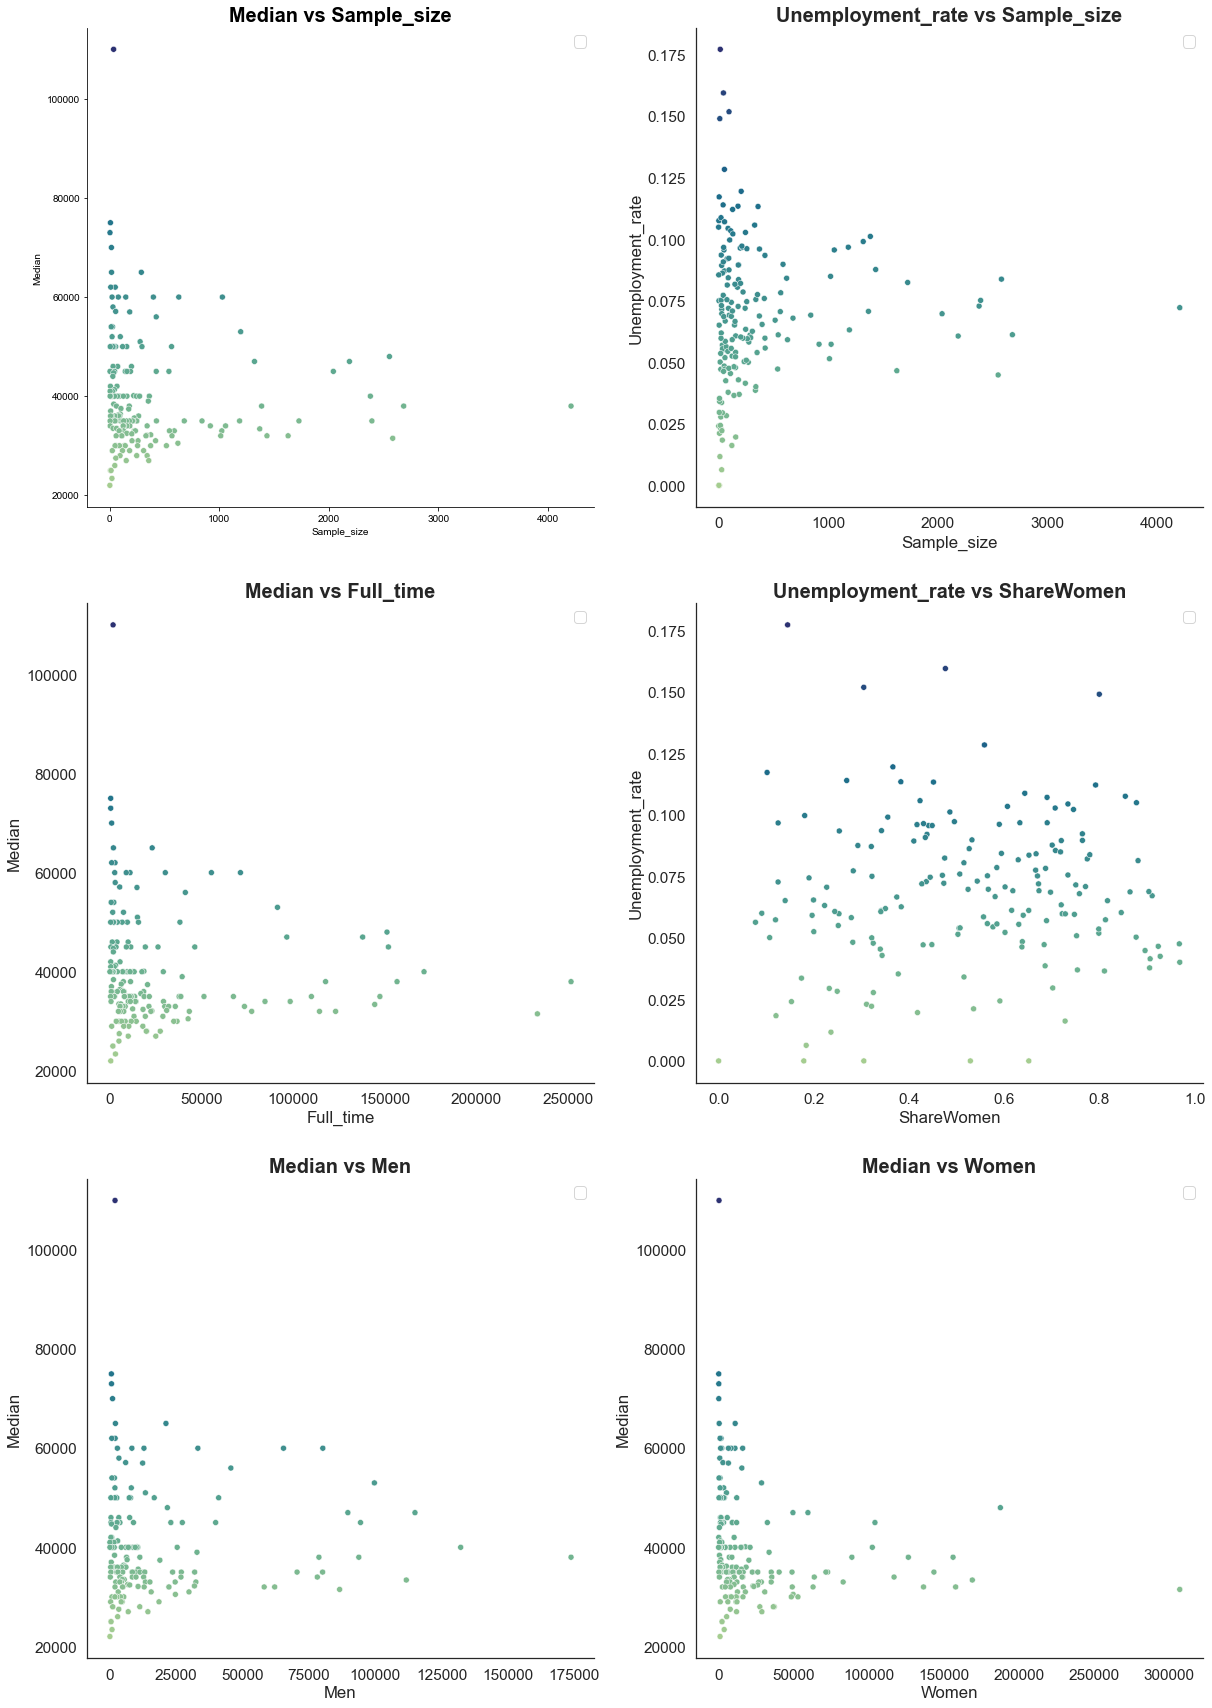

In [13]:
x_axis=['Sample_size','Sample_size','Full_time','ShareWomen','Men','Women']
y_axis=['Median','Unemployment_rate','Median','Unemployment_rate','Median','Median']

fig=plt.figure(figsize=(20,30))
for sp in range(0,6):
    ax=fig.add_subplot(3,2,sp+1)
    sns.set(font_scale=1.4)
    sns.set_style('white')
    sns.scatterplot(data=recent_grads, x=x_axis[sp], y=y_axis[sp], hue=y_axis[sp],palette= "crest")
    plt.title(y_axis[sp] + ' vs '+ x_axis[sp] ,weight='bold').set_fontsize(20)
    sns.despine(bottom=False,left=False)
    plt.legend('')

Based on the plot above, we can see that **all of the plots suggest that there is no significant relationship between the x & y variables:**

- On all the plots except for **'Unemployment_rate vs ShareWomen'**, we can see that there is a high variance near the 0 points, but as the y-value increases the variance diminishes.

- On **'Unemployment_rate vs ShareWomen'**, we can see that the dots are arbitrarily spread out. We can say the variances are pretty much equal at all ranges, which suggest that none of the variables have any effect on each other.

# Remember Three Questions

**Lets Look at them again**

## Q1.  Is there any link between the number of full-time employees and median salary??                                                       
To answer this question we have created **`Median vs Full_Time`** scatter plot:                                          
**`Median : Median earnings of full-time, year-round workers.`      `Full_Time : Employed 35 hours or more.`**                                                                       


#### The answer is no. There is no link between them.                                                                                                                                     
Since we know that on all plots there is no significant relationship between the x & y variable.
                                                                                                                           

                                                                                                                   

So ONE is done!! Two more to work on!!They are:

- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?


Lets make some more plots to answer the questions.


## Q2. Do students in more popular majors make more money?

**`Total :Total number of people with major.`  `Median :Median salary of full-time, year-round workers.`**



**Based on the plot, the answer is no. There is no correlation between Median and Total.
We can see that there is a high variance near the 0 points, but as Total increases the variance diminishes.**

**In other words, there is no correlation between the popularity of the major, and money.**



## Q3. Do students that majored in subjects that were majority female make more money?

**`ShareWomen: Women as share of total.`  `Median: Median salary of full-time, year-round workers.`**

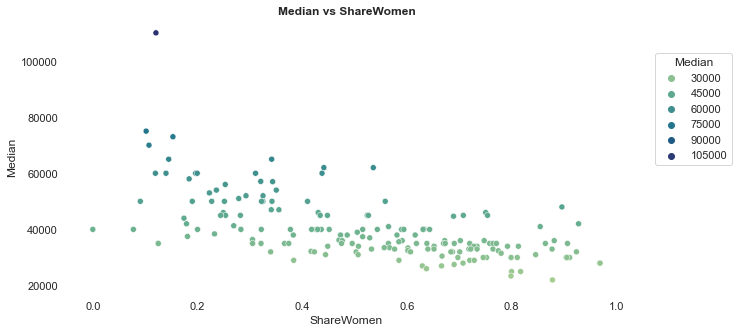

In [34]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='ShareWomen', y='Median', hue='Median',palette="crest", data=recent_grads)
sns.set_style('white')
sns.despine(bottom=True,left=True)
plt.title('Median vs ShareWomen',weight='bold')
plt.legend(bbox_to_anchor=(1.2, 0.9),title= 'Median')
plt.savefig('sample.pdf')

Text(0.5, 1.0, 'Median vs Median')

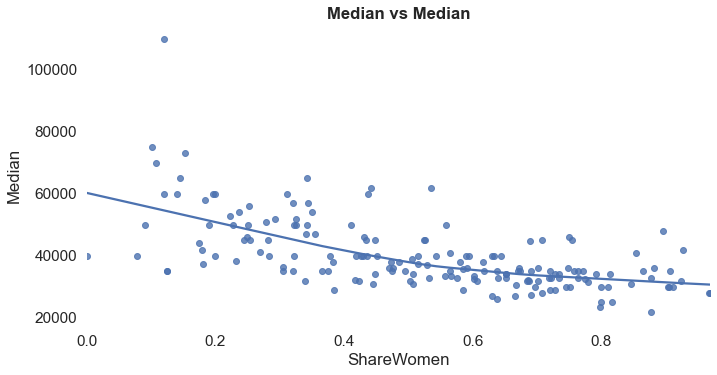

In [15]:
sns.lmplot(x='ShareWomen', y='Median', data=recent_grads, lowess=True,palette="crest",height=5, aspect=2) 
# sns.scatterplot(x='Total', y='Median', hue=y_axis[sp],palette="crest", data=recent_grads)
sns.despine(bottom=True,left=True)
sns.set_style('white')
plt.title('Median vs Median',weight='bold')


**According to the plot, there is a weak negative correlation between Median and ShareWomen. We can see that as the share women increases median decreases.**

**In other way We can say that womens are Choosing the LESS PAID MAJORS.**

**But really, it is True**
Lets dive deeper into this.

## Q3 Analysing: ShareWomen & Median

In [16]:
# Sorting the data in descending order by median
recent_grads.pivot_table(values='Median',index='ShareWomen').sort_values(by='Median',ascending=False)

,Median
ShareWomen,
0.120564,110000
0.101852,75000
0.153037,73000
0.107313,70000
0.144967,65000
...,...
0.637293,26000
0.799859,25000
0.817099,25000


**Result suggest that `The Moajors Which Are Having More Median Values Are Having Less Women Share`**

In [17]:
# Creaing a "ShareMen" column which we will represen the share of mens according to Median value
ShareMen=1-recent_grads['ShareWomen']
recent_grads_new=recent_grads.copy()
recent_grads_new.insert(0,'ShareMen',ShareMen)
comparison_df=recent_grads_new.pivot_table(values=['ShareWomen','ShareMen'],index='Median').sort_values(by='Median',ascending=False)
comparison_df

,ShareMen,ShareWomen
Median,,
110000,0.879436,0.120564
75000,0.898148,0.101852
73000,0.846963,0.153037
70000,0.892687,0.107313
65000,0.756701,0.243299
62000,0.511465,0.488535
60000,0.766020,0.233980
58000,0.816015,0.183985
57100,0.679216,0.320784


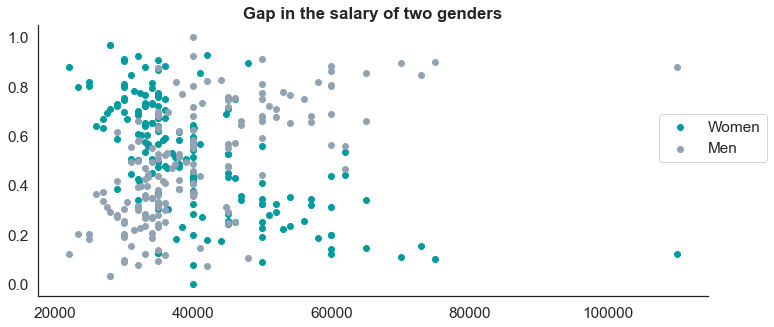

In [18]:
#Scatter plot for representing How Mens have done Majors In more paid jobs as compaired to womens.
ax=plt.figure(figsize=(12,5))
#009B9E,#42B7B9,#A7D3D4,#F1F1F1,#E4C1D9,#D691C1,#C75DAB
plt.scatter(recent_grads['Median'],recent_grads['ShareWomen'],color='#009B9E',label='Women')
plt.scatter(recent_grads['Median'],ShareMen,color = '#91a3b2' ,label='Men')
plt.legend(bbox_to_anchor=(1.1, 0.7))
plt.title("Gap in the salary of two genders",weight='bold')
sns.despine()
plt.show()


**So this Comparison Scatter Plot is representing how the students that majored in subjects that were female majority on average make less money.**

**So for now we are done with all the questions**

- **"Do students in more popular majors make more money?"**                                                              
Answer: No. There is correlation between the popularity of the major, and money.
- **"Do students that majored in subjects that were majority female make more money?"**                                  
Answer: The opposite is true. The students that majored in subjects that were female majority on average make less money.
- **"Is there any link between the number of full-time employees and median salary?"**                                 
Answer: None of them have any link with each other.

Lets create Histograms next for getting better understanding of columns:



## Histogram: Exploring The Distribution of Values In A Column

Using **plt.hist**

**Let's generate histograms to explore the distributions of the following columns:**                                      
* Note: We're going to use `Series.describe()` to understand the data distribution of each column

- `Sample_size: Sample size (unweighted) of full-time, year-round ONLY (used for earnings).`
- `Median: Median salary of full-time, year-round workers.`
- `Employed: Number employed.`
- `Full_time: Number employed 35 hours or more.`
- `ShareWomen: Women as share of total.`
- `Unemployment_rate: Percent of labor force that is jobless.`
- `Men: Male graduates.`
- `Women: Female graduates.`

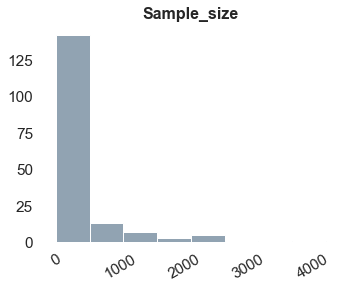

--------------------------------
count     172.000000
mean      357.941860
std       619.680419
min         2.000000
25%        42.000000
50%       131.000000
75%       339.000000
max      4212.000000
Name: Sample_size, dtype: float64
--------------------------------


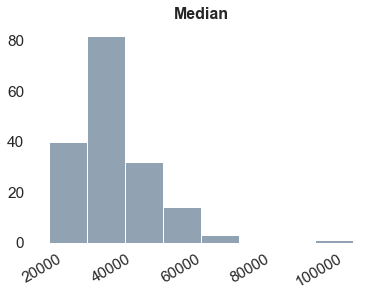

--------------------------------
count       172.000000
mean      40076.744186
std       11461.388773
min       22000.000000
25%       33000.000000
50%       36000.000000
75%       45000.000000
max      110000.000000
Name: Median, dtype: float64
--------------------------------


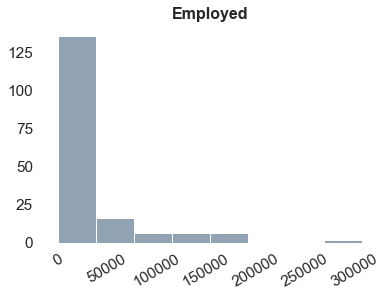

--------------------------------
count       172.00000
mean      31355.80814
std       50777.42865
min           0.00000
25%        3734.75000
50%       12031.50000
75%       31701.25000
max      307933.00000
Name: Employed, dtype: float64
--------------------------------


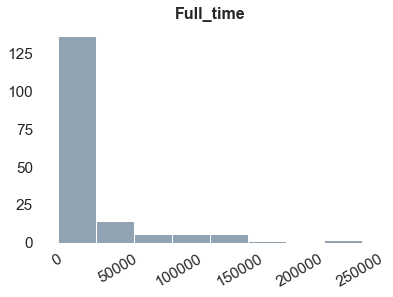

--------------------------------
count       172.000000
mean      26165.767442
std       42957.122320
min         111.000000
25%        3181.000000
50%       10073.500000
75%       25447.250000
max      251540.000000
Name: Full_time, dtype: float64
--------------------------------


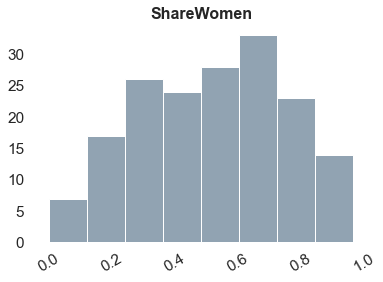

--------------------------------
count    172.000000
mean       0.522223
std        0.231205
min        0.000000
25%        0.336026
50%        0.534024
75%        0.703299
max        0.968954
Name: ShareWomen, dtype: float64
--------------------------------


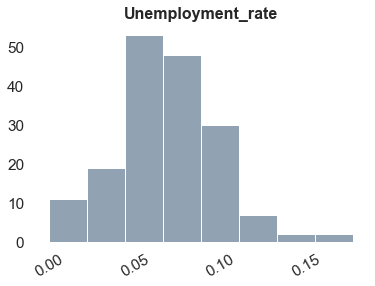

--------------------------------
count    172.000000
mean       0.068024
std        0.030340
min        0.000000
25%        0.050261
50%        0.067544
75%        0.087247
max        0.177226
Name: Unemployment_rate, dtype: float64
--------------------------------


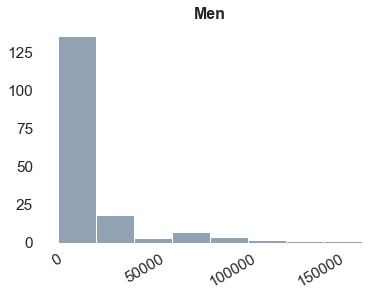

--------------------------------
count       172.000000
mean      16723.406977
std       28122.433474
min         119.000000
25%        2177.500000
50%        5434.000000
75%       14631.000000
max      173809.000000
Name: Men, dtype: float64
--------------------------------


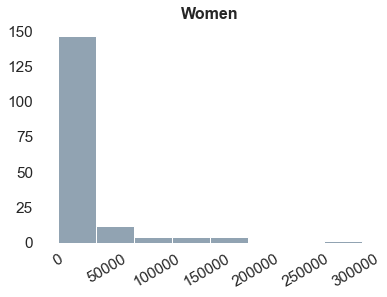

--------------------------------
count       172.000000
mean      22646.674419
std       41057.330740
min           0.000000
25%        1778.250000
50%        8386.500000
75%       22553.750000
max      307087.000000
Name: Women, dtype: float64
--------------------------------


In [19]:
#Generate histograms in one go using a for loop
#we use 8 bins to simplify the visualization
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig=plt.figure(figsize=(50,4))
for sp in range (len(cols)):
    ax=fig.add_subplot(1,8,sp+1)
    sns.set_style('white')
    plt.xticks(rotation=30)
    sns.set(font_scale=1.4)
    plt.hist(x= recent_grads[cols[sp]],  bins = 8,color = '#91a3b2', ec='#ffffff')
    sns.despine(left=True, bottom=True)
    plt.title(cols[sp], weight='bold').set_fontsize('16')
    plt.tick_params(axis = "x", which = "both", bottom = False)
    plt.tick_params(axis='y',which='both',right=False,top=False,bottom=False,left=False)
    plt.show()
    print('--------------------------------')
    print(recent_grads[cols[sp]].describe())
    print('--------------------------------')

**Great!! Using Histograms we are able to visualize the data distribution properly. Now lets conclude:**
*Note: Obviously, histogram and series.describe() will display us slightly different numbers. What we are trying to achieve here is to demonstrate how we can easily visualize data distribution with decent accuracy using histogram.

- Sample_size:
 - Most values are within (0, 500) based on histogram.That means for each Major mostly we have collected data of bout 0-500 students, but for some majors there is also data of even 5000 students.
 - Ie. The values of Sample_size on each major appears to be really low. If it is as low as I think it is, we can't get a highly accurate insights from this data.
 

- Median:
 - Most values are within (30000, 40000) based on histogram.
 - Ie. Students in most majors make around $30,000 - \$40,000 annually.

- Employed:
 - Most values are within (0, 50000) based on histogram
 - 75% values are within [0, 31701] based on series.describe( )
 - Ie in most of Majors there are very low number of people employed.                                                
 **(We will look into this column later in the section)**
 
- Full-time:
 - Most values are within (0, 2500) based on histogram
 - 75% values are within [111, 25447] based on series.describe( )
 - Ie. Most graduates don't have a full-time job
 - Note that the histogram for full-time and employed looks similar, which is intuitively correct.
 
- Unemployment_rate:
 - Most values are within (.05, .0625) based on histogram
 - Common unemployment rates are between 5.5% - 6.25%
 
- Men:
 - Most male garduates are within (0, 25000) based on histogram
 - 75% male graduates are within [119, 14631] based on series.describe( )
 
- Women:
 - Most female graduates are within (0, 25000) based on histogram
 - 75% of female graduates are within [0, 22553] based on series.describe()
 - Hold on, there is a major with 0 female graduates? ( based on series.describe( ) )
 - (We are going to deep dive on this column later in the section)


 






## Analysis: Deep diving on `Sample_size, Employed, ShareWomen, and Women`

**`Sample_size: Sample size (unweighted) of full-time, year-round ONLY (used for earnings)`**

As previously mentioned, the sample size seem to be really low.
Let explore this column even more, and then find the percentage of sample size by calculating Sample_size / Full_time_year_round.




In [20]:
#Getting the for Sample_size less then 500
data_under_500=recent_grads.loc[recent_grads['Sample_size'].between(0,500)]
data_under_500.sort_values(by='Sample_size', ascending=False)


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
97,98,5098,MULTI-DISCIPLINARY OR GENERAL SCIENCE,62052.0,27015.0,35037.0,Physical Sciences,0.564639,427,46138,...,13133,28966,2727,0.055807,35000,24000,50000,17923,22039,5751
17,18,2400,GENERAL ENGINEERING,61152.0,45683.0,15469.0,Engineering,0.252960,425,44931,...,7199,33540,2859,0.059824,56000,36000,69000,26898,11734,3192
42,43,2100,COMPUTER AND INFORMATION SYSTEMS,36698.0,27392.0,9306.0,Computers & Mathematics,0.253583,425,28459,...,4332,21130,2934,0.093460,45000,30000,60000,13344,11783,1672
146,147,6002,MUSIC,60633.0,29909.0,30724.0,Arts,0.506721,419,47662,...,24943,21425,3918,0.075960,31000,22300,42000,13752,28786,9286
10,11,2407,COMPUTER ENGINEERING,41542.0,33258.0,8284.0,Engineering,0.199413,399,32506,...,5146,23621,2275,0.065409,60000,45000,75000,23694,5721,980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.000000,4,0,...,0,111,0,0.000000,40000,40000,40000,0,0,0
55,56,2303,SCHOOL STUDENT COUNSELING,818.0,119.0,699.0,Education,0.854523,4,730,...,135,545,88,0.107579,41000,41000,43000,509,221,0
48,49,3607,PHARMACOLOGY,1762.0,515.0,1247.0,Biology & Life Science,0.707719,3,1144,...,532,565,107,0.085532,45000,40000,45000,603,478,93
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0


Sample_size	Sample size (unweighted) of full-time, year-round ONLY (used for earnings)                                   
Full_time_year_round	Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)                          
**IN other words Sample_size column reflects the number of people from Full_time_year_round that reported their earnings.**
So lets look the ratio of `Sample_size` and `Full_time_year_round.`


In [21]:
# Calculating the percentage, how much data is having sample_data less then 500.
print('So we can conclude that around',round((data_under_500.shape[0]/recent_grads.shape[0])*100,2),'% of data is having sample_size between (0,500).')


So we can conclude that around 81.98 % of data is having sample_size between (0,500).


- If we look at the last row in the sorted common_samplesize dataframe above (row #172), apparently for **"LIBRARY SCIENCE"** Major, out of 410 Full_time_year_round values, there are only 2 Sample_size values.
- **Sample_size / Full_time_year_round = 2 / 410 = .004 = .4%**

#### so the sample sie is too low for giving us meaningful results

### Employed:

In [22]:
# discriptive statistics 
recent_grads['Employed'].describe()

count       172.00000
mean      31355.80814
std       50777.42865
min           0.00000
25%        3734.75000
50%       12031.50000
75%       31701.25000
max      307933.00000
Name: Employed, dtype: float64

- So we can conclude that:
 - min= `0`, that means in some `Majors` there are also **Zero** people employed.
 - max= `307933`
 
 **Lets have the data for the "major" having zero people employed**

In [23]:
recent_grads.loc[recent_grads['Employed']==0, :]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.0,4,0,...,0,111,0,0.0,40000,40000,40000,0,0,0


- **Major** - MILITARY TECHNOLOGIES
- Employed	-0
- Median = 40000
- Unemployed- 0
- College_jobs- 0
- Non_college_jobs -0	
- Low_wage_jobs- 0


So..hmmm...something is worng with data, after searching alot i got [this](https://github.com/fivethirtyeight/data/issues/250)

**Total != Employed + Unemployed                                                     
Total != College_jobs + Non_college_jobs, + Low_wage_jobs**

In [24]:
# Now lets look at the Major which is having maximum people employed

a=recent_grads['Employed'].max()

recent_grads.loc[recent_grads['Employed']==a,:]


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
145,146,5200,PSYCHOLOGY,393735.0,86648.0,307087.0,Psychology & Social Work,0.779933,2584,307933,...,115172,174438,28169,0.083811,31500,24000,41000,125148,141860,48207


**So If we will look according to the no. of people employed so its in `PSYCHOLOGY	` but the `Unemployment_rate	` rate is also `quite high`(0.083811)**

So Now we will look according to `Unemployment_rate` 


     

In [25]:
# fetching data for Mjors which are having Unemployment_rate=0
recent_grads.loc[recent_grads['Unemployment_rate']<=0.0, ['Employed', 'Major','Unemployed','Total','Men','Women','Sample_size','Full_time_year_round']]

,Employed,Major,Unemployed,Total,Men,Women,Sample_size,Full_time_year_round
52,559,MATHEMATICS AND COMPUTER SCIENCE,0,609.0,500.0,109.0,7,391
73,0,MILITARY TECHNOLOGIES,0,124.0,124.0,0.0,4,111
83,1010,BOTANY,0,1329.0,626.0,703.0,9,740
112,613,SOIL SCIENCE,0,685.0,476.0,209.0,4,383
120,703,EDUCATIONAL ADMINISTRATION AND SUPERVISION,0,804.0,280.0,524.0,5,504


So these are the Majors having zero unemployment rate..

Moving on......

**`ShareWomen: Women as share of total`**

We are going to answer one of the question that we have in the introduction, which is


**"How many majors are predominantly male?"**

In [26]:
# Create a new column
recent_grads['gender_majority']=np.nan

# Updating gender_majority column according to ShareWomen.
recent_grads.loc[recent_grads['ShareWomen']>.5,'gender_majority']='Female'
recent_grads.loc[recent_grads['ShareWomen']<.5,'gender_majority']='Male'

recent_grads



,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,gender_majority
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,1207,37,0.018381,110000,95000,125000,1534,364,193,Male
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,388,85,0.117241,75000,55000,90000,350,257,50,Male
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,340,16,0.024096,73000,50000,105000,456,176,0,Male
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,692,40,0.050125,70000,43000,80000,529,102,0,Male
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,16697,1672,0.061098,65000,50000,75000,18314,4440,972,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,3602,304,0.046320,26000,20000,39000,2771,2947,743,Female
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,1211,148,0.065112,25000,24000,34000,1488,615,82,Female
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,1293,368,0.149048,25000,25000,40000,986,870,622,Female
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,2738,214,0.053621,23400,19200,26000,2403,1245,308,Female


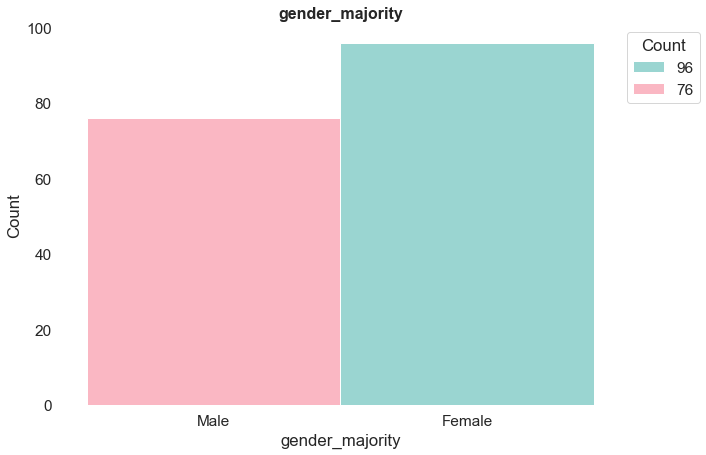

In [27]:
# lets display gender_majority by using histogram

plt.figure(figsize=(10,7))
sns.set_style('white')
sns.histplot(data = recent_grads, x= "gender_majority",hue = "gender_majority", palette="husl") 
sns.despine(left=True, bottom=True)
plt.tick_params(axis = "x", which = "both", bottom = False)
plt.tick_params(axis='y',which='both',right=False,top=False,bottom=False,left=False)
plt.title("gender_majority", weight='bold').set_fontsize('16')

#display legend
plt.legend(recent_grads["gender_majority"].value_counts(),bbox_to_anchor=(1, 1), title= 'Count') 
plt.show()

**As we can see, 96 majors are predominantly Female, and 76 majors are predominantly Male.**


**`Women: Female graduates`**

Based on series.describe( ) there is a major with 0 female graduates, I wonder how..



In [28]:
# checking for the Major which is having no female graduates
recent_grads.loc[recent_grads['Women']==0, :]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,gender_majority
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.0,4,0,...,111,0,0.0,40000,40000,40000,0,0,0,Male


Ohh.........its **`Military Technologies`**, so we don't have proper data for this Major

Let's do a little recap before we go onwards:

In the last 2 sections, we created the following:

**Scatter plots** to visualize potential relationships between the following columns:

- Sample_size and Median
- Sample_size and Unemployment_rate
- Full_time and Median
- ShareWomen and Unemployment_rate
- Men and Median
- Women and Median
- Total vs Median
- Median vs ShareWomen (we also did a deep dive analysis on this one, by creating a bar plot)
Based on our scatter plots, we find that:

- **"Do students in more popular majors make more money?"**
  - Answer: No. There is correlation between the popularity of the major, and money.
- **"Do students that majored in subjects that were majority female make more money?"**
  - Answer: The opposite is true. The students that majored in subjects that were female majority on average make less money.
- **"Is there any link between the number of full-time employees and median salary?"**
  - Answer: None of them have amy link with each other
  

**Histograms **  to visualize the distributions of the following columns:
Sample_size, Median, Employed, Full_time, ShareWomen, Unemployment_rate, Men, and Women

We also did further analysis on Sample_size, Employed, ShareWomen, and Women

We answered the question, **"How many majors are predominantly male?"**  by creating a bar plot when deep diving on ShareWomen.


### Searching the `Major` in which there are maximum number of `Employed` Students:
 
**For Both Full_Time & Part_time**



In [29]:
# lets see how many people are Full_Time_employed and and in which Major 
a=recent_grads['Full_time'].max()
print('The Majority no. of people employed are : ',a)

The Majority no. of people employed are :  251540


In [30]:
recent_grads.loc[recent_grads['Full_time']==a,['Major','Total','Men','Women','Employed','Median']]

,Major,Total,Men,Women,Employed,Median
76,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,173809.0,156118.0,276234,38000


So in **'BUSINESS MANAGEMENT AND ADMINISTRATION'** the maximum number of students are full time employed that is **251540** but the **Median is less**

# Scatter Matrix (Pair Plot) : Exploring Potential Relationships And Distributions Simultaneously

- **Finding the relationship between "Sample_size" & "Median"**
- **Finding Realtionship among 'Sample_size', 'Median', 'Unemployment_rate'**




<Figure size 2880x360 with 0 Axes>

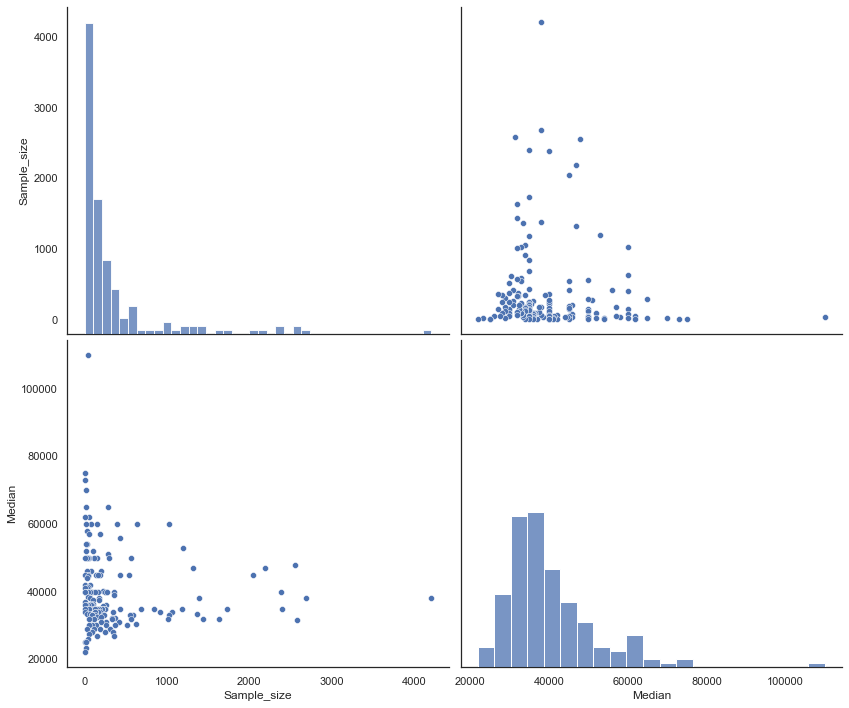

In [31]:
# creating pair plot by using pairplot function.
m=['Sample_size','Median']
plt.figure(figsize=(40,5))
sns.set_theme(style="white")
x=recent_grads.loc[:,['Sample_size', 'Median']]
sns.pairplot(x,height=5,aspect=1.2)
plt.show()

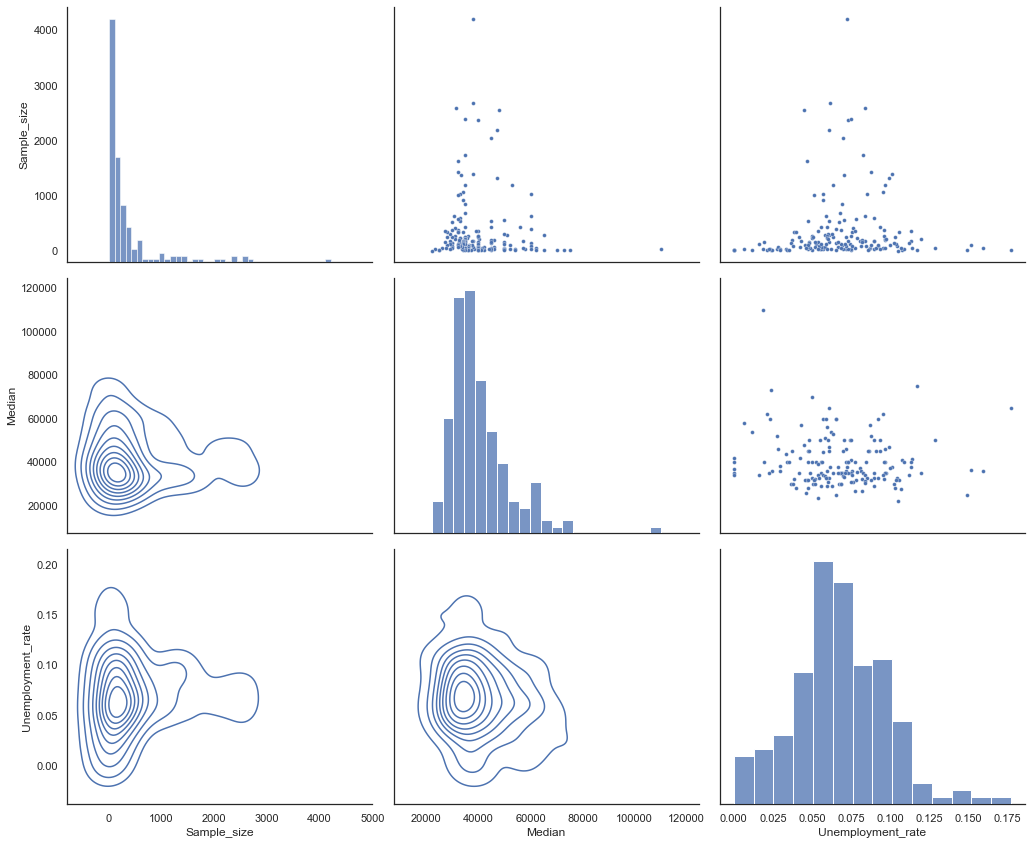

In [35]:
# Using PairGrid Function for understanding the relationship among  'Sample_size', 'Median', 'Unemployment_rate'

y=recent_grads.loc[:,['Sample_size', 'Median', 'Unemployment_rate']]
g = sns.PairGrid(y,diag_sharey=False,height=4,aspect=1.2)
sns.set_style('white')
g.map_upper(sns.scatterplot, s=15) # Upper side of diagonal  should be scatter plot
g.map_lower(sns.kdeplot)# lower shide of diagonal should be kernal density plot
g.map_diag(sns.histplot) # at diagonal creating histograms.
plt.savefig('sample1.pdf')

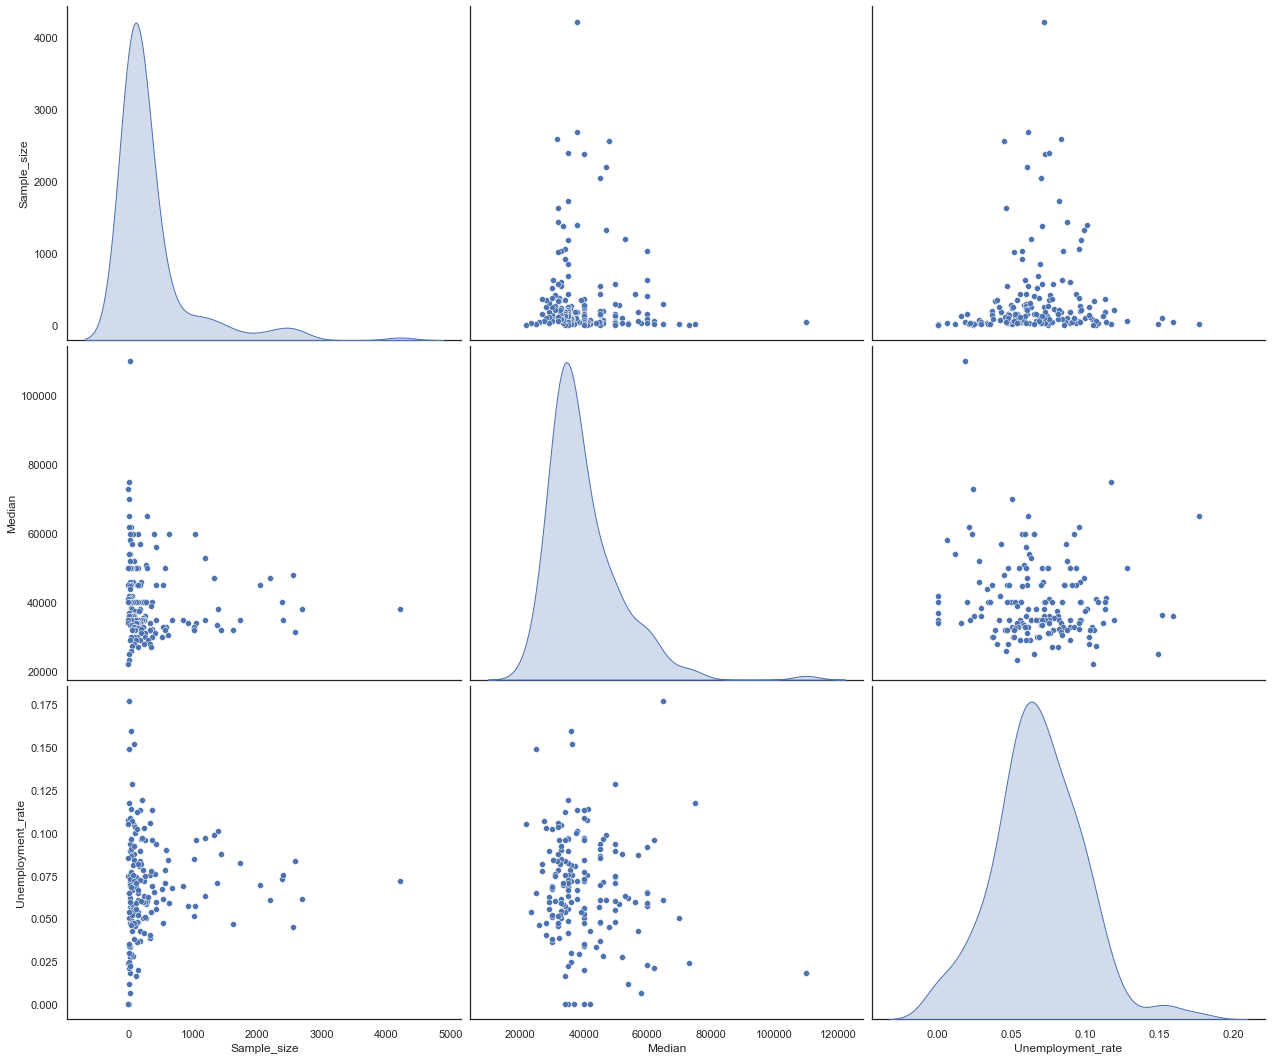

In [36]:
# same realtion but by creating scatter plot and histograms 
sns.pairplot(y,height=5,aspect=1.2,hue=None,diag_kind="kde")
g.map_lower(sns.kdeplot, color=".2")

**As we can see, there is no correlation between sample size, median, and enemployment rate.**
*these scatter matrices confirmed our findings in the previous sections.

**Now, let's use scatter matrix to validate our answers to the three questions that we have**

To do that, we are going to create 3 scatter matrices (pair plots):

- Total and Median
- ShareWomen and Median
- Full_time and Median    


**`Total :Total number of people with major. Full_time: Number employed 35 hours or more ShareWomen: Women as share of total. Median :Median salary of full-time, year-round workers.`**

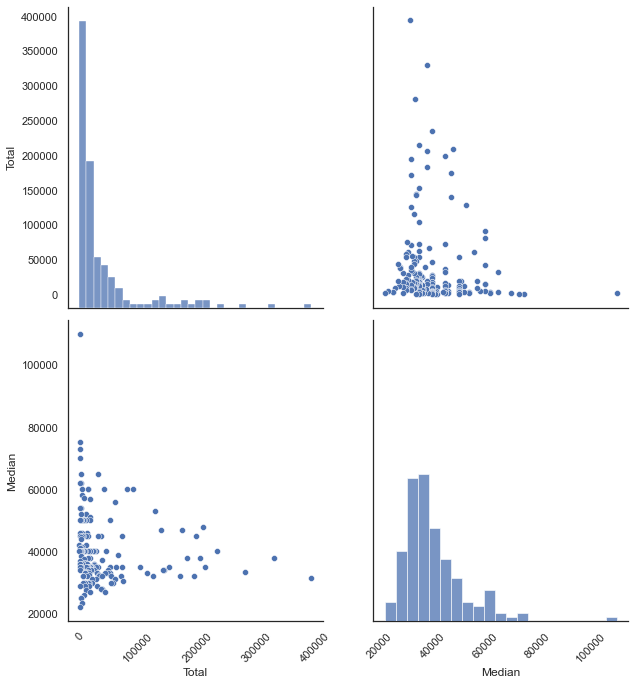

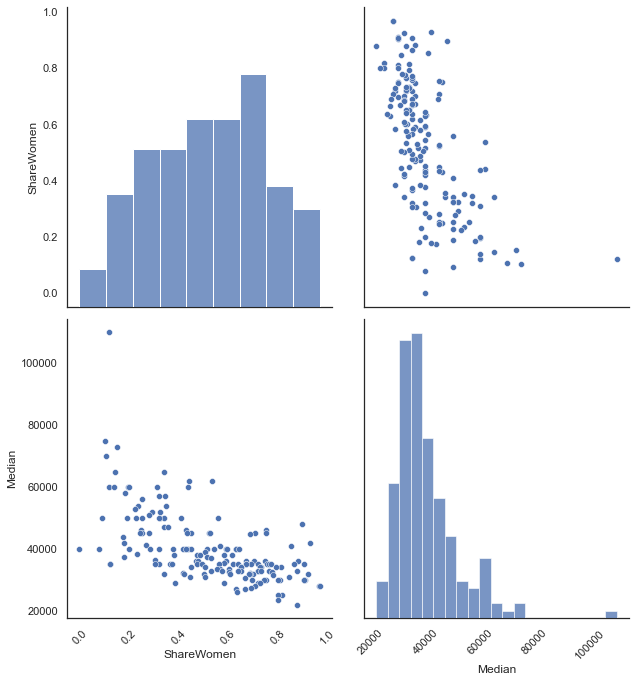

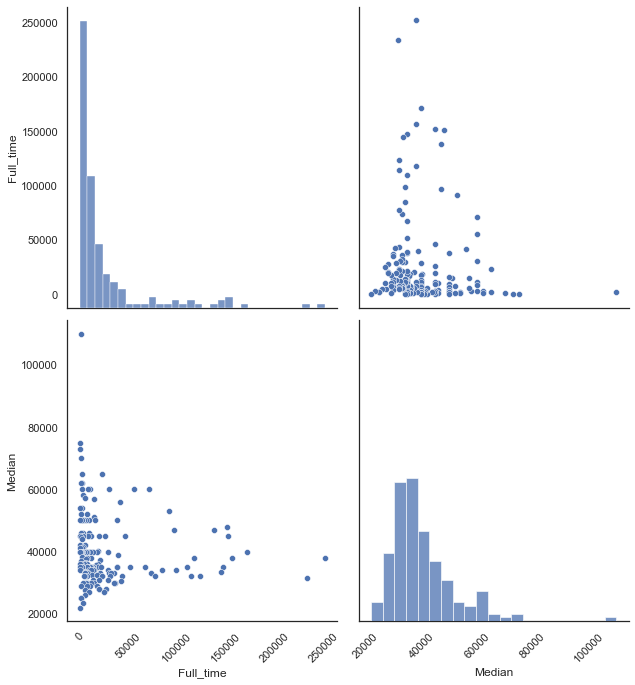

In [37]:
pairs = [['Total', 'Median'], ['ShareWomen', 'Median'], ['Full_time', 'Median']]

for pair in range(len(pairs)):
    pairplot = sns.pairplot(recent_grads[pairs[pair]])
    pairplot.fig.set_size_inches(10,10)
    for ax in pairplot.axes.flat: #rotate x-axis labels
        ax.tick_params("x", labelrotation=45)

Okay Great! Scatter matrix and scatter plot give us the same answer. This help us validate our answer in the previous sections.

And uh, actually, we are done with scatter matrix. So Let's do another reflection...

In the last 3 sections, we created the following:

Scatter plots to visualize potential relationships between the following columns:

Sample_size and Median
Sample_size and Unemployment_rate
Full_time and Median
ShareWomen and Unemployment_rate
Men and Median
Women and Median
Total vs Median
Median vs ShareWomen (we also did a deep dive analysis on this one, by creating a bar plot)
Based on our scatter plots, we find that:

**"Do students in more popular majors make more money?"**
- Answer: No. There is correlation between the popularity of the major, and money.
**"Do students that majored in subjects that were majority female make more money?"**
- Answer: The opposite is true. The students that majored in subjects that were female majority on average make less money.
**"Is there any link between the number of full-time employees and median salary?"**
- Answer: None of them have amy link with each other

Histograms to visualize the distributions of the following columns:
Sample_size, Median, Employed, Full_time, ShareWomen, Unemployment_rate, Men, and Women

We also did further analysis on Sample_size, Employed, ShareWomen, and Women

We answered the question, **"How many majors are predominantly male?"** by creating a bar plot when deep diving on ShareWomen
Scatter matrix plots to visually explore potential relationships and distributions of the following:

- Sample_size and Median
- Sample_size, Median, and Unemployment_rate
- Total and Median
- ShareWomen and Median
- Full_time and Median
Using scatter matrix plots, we managed to validate our answers in the previous sections.

Next!

## Bar Plots: Comparing some columns

**Using sns.barplot**
Let's generate barplots to do the following:

- Compare the percentages of women (ShareWomen) from the first ten rows and last ten rows
of the recent_grads dataframe, while having major on the x-axis.
- Compare the unemployment rate (Unemployment_rate) from the first ten rows and last ten rows
of the recent_grads dataframe, while having major on the x-axis.

So we will see the Top 10 majors( `Highest Paid Majors`) - What is ShareWomen 

In [38]:
#Top 10 majors with the Median salary
recent_grads.loc[:10,['Major','Median']]

,Major,Median
0,PETROLEUM ENGINEERING,110000
1,MINING AND MINERAL ENGINEERING,75000
2,METALLURGICAL ENGINEERING,73000
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,70000
4,CHEMICAL ENGINEERING,65000
5,NUCLEAR ENGINEERING,65000
6,ACTUARIAL SCIENCE,62000
7,ASTRONOMY AND ASTROPHYSICS,62000
8,MECHANICAL ENGINEERING,60000
9,ELECTRICAL ENGINEERING,60000


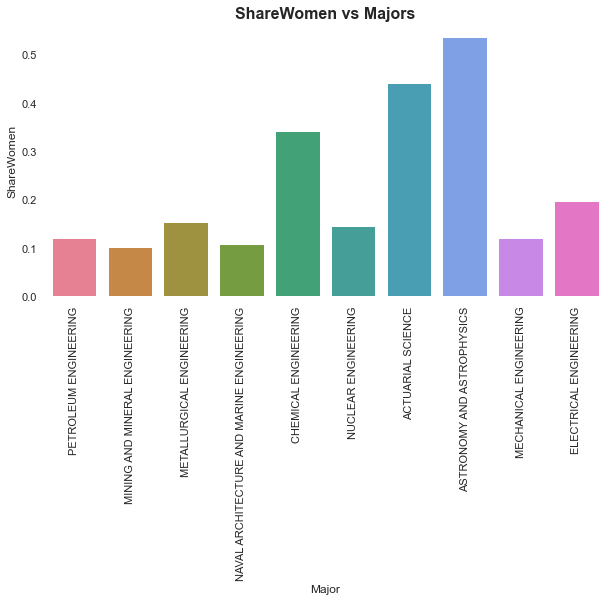

In [39]:
fig, ax =plt.subplots(1,1, figsize =(10,5))
sns.barplot(x=recent_grads[:10]['Major'], y=recent_grads[:10]['ShareWomen'],ci=None,palette='husl')
sns.despine(left=True, bottom=True)
plt.title('ShareWomen vs Majors',weight='bold').set_fontsize('16')
ax.set_xticklabels(recent_grads[:10]['Major'], rotation='vertical')
plt.show()

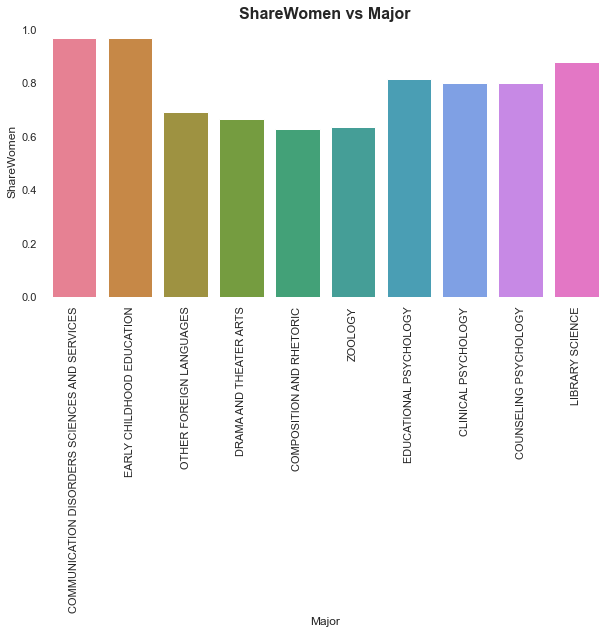

In [40]:
fig, ax =plt.subplots(1,1, figsize =(10,5))

plt.xlabel('Major')
plt.ylabel('ShareWomen')
sns.barplot(x=recent_grads[-10:]['Major'], y=recent_grads[-10:]['ShareWomen'], ci=None,palette='husl')
ax.set_xticklabels(recent_grads[-10:]['Major'], rotation='vertical')
sns.despine(left=True, bottom=True)
plt.title("ShareWomen vs Major", weight='bold').set_fontsize('16')

**Remember that this dataset is ordered by median earnings?**

- It's interesting to see that only 1 out of 10 majors with the highest median earnings are predominantly female (ASTRONOMY AND ASTROPHYSICS).
- On the other hand, the 10 majors with the lowest median earnings are all predominantly female. Again, very interesting.

This result also validates our findings in the earlier section, that there is a negative correlation between ShareWomen and Median.
Unemployment_rate vs Major

## Lets look at the Majors in which are Highly Paid

                            Major   P75th
0           PETROLEUM ENGINEERING  125000
7      ASTRONOMY AND ASTROPHYSICS  109000
2       METALLURGICAL ENGINEERING  105000
5             NUCLEAR ENGINEERING  102000
1  MINING AND MINERAL ENGINEERING   90000


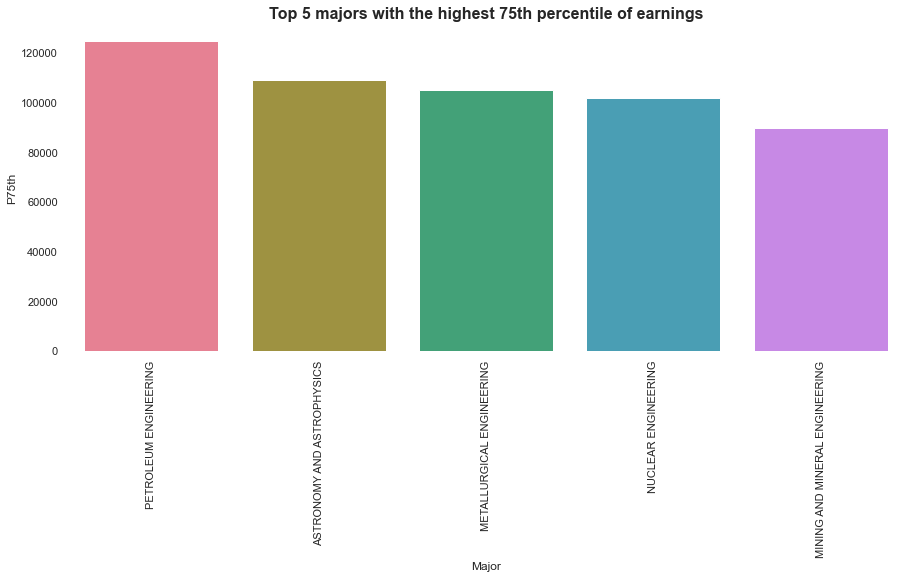

In [41]:
imp=recent_grads['P75th'].sort_values(ascending=False).index
major_highest_P75th=recent_grads.loc[imp,['Major','P75th']].head(5)
print(major_highest_P75th)
fig, ax =plt.subplots(1,1,figsize=(15,6))
plt.title("Top 5 majors with the highest 75th percentile of earnings", weight='bold').set_fontsize('16')
sns.barplot(x=major_highest_P75th['Major'], y=major_highest_P75th['P75th'], data=recent_grads, ci=None,palette='husl').set_xticklabels(
                                                                labels=major_highest_P75th['Major'],rotation='vertical')
sns.despine(left=True, bottom=True)

So if anyone want to get rich, Choose any of these majors:

PETROLEUM ENGINEERING                                                                                               
ASTRONOMY AND ASTROPHYSICS                                                                                            
METALLURGICAL ENGINEERING                                                                                                   
NUCLEAR ENGINEERING                                                                                                          
PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION                                                                  
(The key for success) **;D**

Major
BUSINESS MANAGEMENT AND ADMINISTRATION    199897
PSYCHOLOGY                                174438
GENERAL BUSINESS                          138299
MARKETING AND MARKETING RESEARCH          127230
ACCOUNTING                                123169
Name: Full_time_year_round, dtype: int64


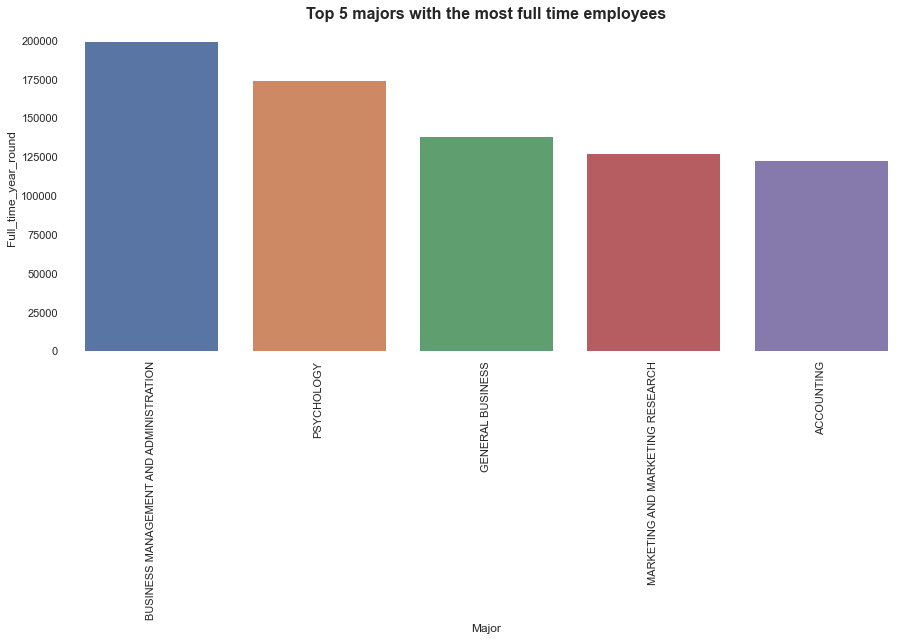

In [42]:
major_most_fulltime = recent_grads.groupby(["Major"])["Full_time_year_round"].mean().sort_values(
                                                                                            ascending=False).head()
print(major_most_fulltime)

fig, ax =plt.subplots(1,1,figsize=(15,6))
plt.title("Top 5 majors with the most full time employees", weight='bold').set_fontsize('16')
sns.barplot(x=major_most_fulltime.index, y=major_most_fulltime, data=recent_grads, ci=None).set_xticklabels(
                                                            labels=major_most_fulltime.index,rotation='vertical')

sns.despine(left=True, bottom=True)

**And for any of you wants to get a full time job easily, try get into any of these majors:**

- BUSINESS MANAGEMENT AND ADMINISTRATION
- PSYCHOLOGY
- GENERAL BUSINESS
- MARKETING AND MARKETING RESEARCH
- ACCOUNTING

## Conclusion & Insights

Q&A

**"Do students in more popular majors make more money?"**
- Answer: No. There is correlation between the popularity of the major, and money
**"Do students that majored in subjects that were majority female make more money?"**
- Answer: The opposite is true. The students that majored in subjects that were female majority on average make less money.
**"Is there any link between the number of full-time employees and median salary?"**
- Answer: None of them have amy link with each other
**"How many majors are predominantly male?"**
- Answer: 76 majors are predominantly male, and 96 majors are predominantly Female

#### Major statistics

Top 3 majors that are **predominantly female:Education, Health, and Psychology & Social Work**. (in order)
Top 3 majors that are **predominantly male: Engineering, Computers & Mathematics, and Business**. (in order)
Top 5 majors with the **highest 75th percentile of earnings:**
- PETROLEUM ENGINEERING
- ASTRONOMY AND ASTROPHYSICS
- METALLURGICAL ENGINEERING
- NUCLEAR ENGINEERING
- PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTRATION

**Top 5 majors with the most full time employees:**
- BUSINESS MANAGEMENT AND ADMINISTRATION
- PSYCHOLOGY
- GENERAL BUSINESS
- MARKETING AND MARKETING RESEARCH
- ACCOUNTING

**Correlation** 
Median vs ShareWomen = Weak negative correlation
Extra

Students in most majors make around $30,000 - \$40,000 annually.
Female represent 60% - 70% total number of people per major
Common unemployment rates are between 5.5% - 6.25%
Only 1 out of 10 majors with the highest median earnings are predominantly female (ASTRONOMY AND ASTROPHYSICS).
10 majors with the lowest median earnings are all predominantly female.


## Conclusion:
(What i told my cusion)

- **Stick to Engineering and Technology** - it will lead to higher paying jobs as an undergrad and have the least Share of women.
- Looking at **ratios of men to women to decide on picking a major may help to stand out as a wome**n. Engineering majors tend to have a low percentage of men to women. there are culture trends related to woment diversity inititives like #girlpower and #equalpay. It may be beneficial to try to enter the workforce in a male dominted major as it could be a good way to stand out from other applicants.
